## Import all necessary libraries

In [9]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
%matplotlib inline

## Read the business json file

In [2]:
business_json_file = 'yelp_academic_dataset_business.json'
df_business = pd.read_json(business_json_file , lines=True)
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


## Kmean Clustering method
### Features : stars and reviews count

### filter the business - keep only stars and reviews_count

In [3]:
#get the first 500 rows
df_business_filtered = df_business.iloc[0:500]

#keep only star and review_count columns
df_business_filtered = df_business_filtered.iloc[:,8:10]

df_business_filtered

,stars,review_count
0,5.0,7
1,3.0,15
2,3.5,22
3,4.0,80
4,4.5,13
...,...,...
495,3.5,92
496,1.5,18
497,4.0,14
498,3.0,17


[[   4.03125     405.25      ]
 [   3.66493776   30.63900415]
 [   3.5        2021.5       ]]


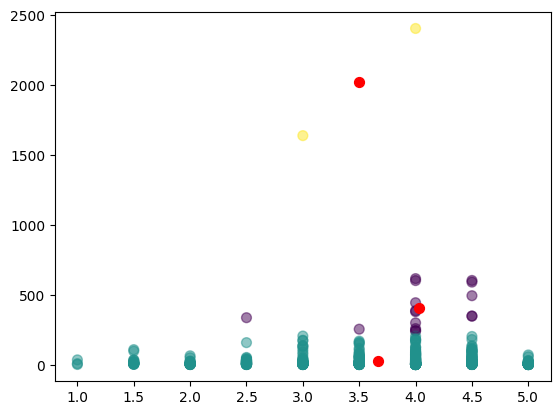

In [5]:
# kmeans with stars and review_counts  
kmeans = KMeans(n_clusters=3).fit(df_business_filtered)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_business_filtered['stars'], df_business_filtered['review_count'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

---

## Kmean Clustering method with longitude and Latitude

## filter the business 2
### keep only Longitude and Latitude

In [7]:
#get the first 500 rows
df_business_filtered_2 = df_business.iloc[0:500]

#keep only star and review_count columns
df_business_filtered_2 = df_business_filtered_2.iloc[:,6:8]

df_business_filtered_2

,latitude,longitude
0,34.426679,-119.711197
1,38.551126,-90.335695
2,32.223236,-110.880452
3,39.955505,-75.155564
4,40.338183,-75.471659
...,...,...
495,32.207596,-110.881629
496,40.217860,-74.926634
497,32.268074,-110.992390
498,53.488591,-113.493509


[[  33.38326611  -86.15347603]
 [  38.76500799 -114.84703708]
 [  40.0132843   -75.19714779]]


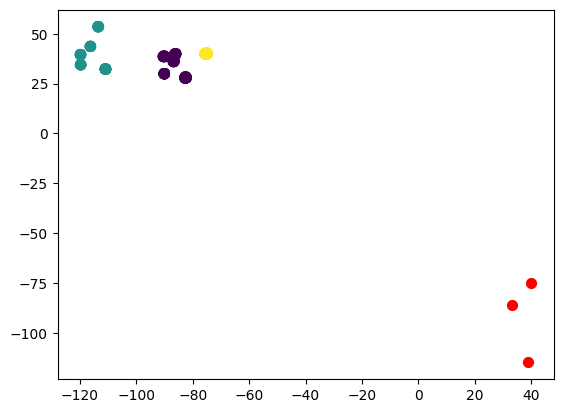

In [8]:
# kmeans with Longitude and Latitude   
kmeans = KMeans(n_clusters=3).fit(df_business_filtered_2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_business_filtered_2['longitude'], df_business_filtered_2['latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

---

## KModes Clustering method
### Feartures : City and Categories

### filter the business 3 - keep only  City and Categories

In [30]:
#get the first 500 rows
df_business_filtered_3 = df_business.iloc[0:500]

#keep only city and categories columns
df_business_filtered_3 = df_business_filtered_3[['city','categories']]


df_business_filtered_3

,city,categories
0,Santa Barbara,"Doctors, Traditional Chinese Medicine, Naturop..."
1,Affton,"Shipping Centers, Local Services, Notaries, Ma..."
2,Tucson,"Department Stores, Shopping, Fashion, Home & G..."
3,Philadelphia,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,Green Lane,"Brewpubs, Breweries, Food"
...,...,...
495,Tucson,"Automotive, Car Dealers, Auto Detailing, Auto ..."
496,Langhorne,"Italian, Restaurants, Fast Food, Chicken Wings..."
497,Tucson,"Home Services, Tree Services, Junk Removal & H..."
498,Edmonton,"Hotels, Event Planning & Services, Hotels & Tr..."


In [31]:
kmodes = KModes(n_clusters=10, init = "random", n_init = 5, verbose=1)
clusters = kmodes.fit_predict(df_business_filtered_3)
clusters

df_business_filtered_3.insert(0,"Cluster",clusters,True)
df_business_filtered_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 793.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 831.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 810.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 836.0
Best run was number 1


,Cluster,city,categories
0,0,Santa Barbara,"Doctors, Traditional Chinese Medicine, Naturop..."
1,0,Affton,"Shipping Centers, Local Services, Notaries, Ma..."
2,4,Tucson,"Department Stores, Shopping, Fashion, Home & G..."
3,0,Philadelphia,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,0,Green Lane,"Brewpubs, Breweries, Food"
...,...,...,...
495,4,Tucson,"Automotive, Car Dealers, Auto Detailing, Auto ..."
496,0,Langhorne,"Italian, Restaurants, Fast Food, Chicken Wings..."
497,4,Tucson,"Home Services, Tree Services, Junk Removal & H..."
498,0,Edmonton,"Hotels, Event Planning & Services, Hotels & Tr..."


---

## KModes Clustering method
### Features : City, State, Categories, Categories

### filter the business 4 - keep only  Categories

In [67]:
#get the first 500 rows
df_business_filtered_4 = df_business.iloc[0:500]

#keep only city and categories columns
df_business_filtered_4 = df_business_filtered_4[['city','state','categories','review_count']]


df_business_filtered_4

,city,state,categories,review_count
0,Santa Barbara,CA,"Doctors, Traditional Chinese Medicine, Naturop...",7
1,Affton,MO,"Shipping Centers, Local Services, Notaries, Ma...",15
2,Tucson,AZ,"Department Stores, Shopping, Fashion, Home & G...",22
3,Philadelphia,PA,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80
4,Green Lane,PA,"Brewpubs, Breweries, Food",13
...,...,...,...,...
495,Tucson,AZ,"Automotive, Car Dealers, Auto Detailing, Auto ...",92
496,Langhorne,PA,"Italian, Restaurants, Fast Food, Chicken Wings...",18
497,Tucson,AZ,"Home Services, Tree Services, Junk Removal & H...",14
498,Edmonton,AB,"Hotels, Event Planning & Services, Hotels & Tr...",17


In [68]:
kmodes = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmodes.fit_predict(df_business_filtered_4)
clusters

df_business_filtered_4.insert(0,"Cluster",clusters,True)
df_business_filtered_4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 48, cost: 1492.0
Run 1, iteration: 2/100, moves: 0, cost: 1492.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 27, cost: 1481.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 24, cost: 1395.0
Run 3, iteration: 2/100, moves: 35, cost: 1394.0
Run 3, iteration: 3/100, moves: 0, cost: 1394.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20, cost: 1416.0
Run 4, iteration: 2/100, moves: 1, cost: 1416.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 28, cost: 1414.0
Run 5, iteration: 2/100, moves: 0, cost: 1414.0
Best run was number 3


,Cluster,city,state,categories,review_count
0,0,Santa Barbara,CA,"Doctors, Traditional Chinese Medicine, Naturop...",7
1,0,Affton,MO,"Shipping Centers, Local Services, Notaries, Ma...",15
2,1,Tucson,AZ,"Department Stores, Shopping, Fashion, Home & G...",22
3,0,Philadelphia,PA,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80
4,0,Green Lane,PA,"Brewpubs, Breweries, Food",13
...,...,...,...,...,...
495,1,Tucson,AZ,"Automotive, Car Dealers, Auto Detailing, Auto ...",92
496,0,Langhorne,PA,"Italian, Restaurants, Fast Food, Chicken Wings...",18
497,1,Tucson,AZ,"Home Services, Tree Services, Junk Removal & H...",14
498,0,Edmonton,AB,"Hotels, Event Planning & Services, Hotels & Tr...",17


---